<a href="https://colab.research.google.com/github/meenprasadjaisi/Machine-Learning-Projects/blob/main/End_to_End_ML_Project_with_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [2]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

In [3]:
# Loading the dataset into pandas dataframe
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df = df.drop(columns='Unnamed: 0', axis = 1)

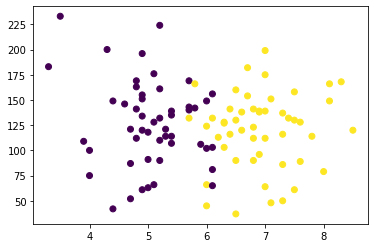

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [6]:
# Extract input and output cols
X = df.drop(columns='placement', axis=1)
Y = df['placement']

In [7]:
# Spliting the dataset into Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0, stratify=Y, shuffle=True)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Creating the model
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [10]:
# Predict the accuracy of training data
X_train_prediction = model.predict(X_train)
training_data_prediction = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data is : ', training_data_prediction)

Accuracy on Training data is :  0.925


In [11]:
# Predict the accuracy of testing data
X_test_prediction = model.predict(X_test)
testing_data_prediction = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Testing data is : ', testing_data_prediction)

Accuracy on Testing data is :  0.95


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


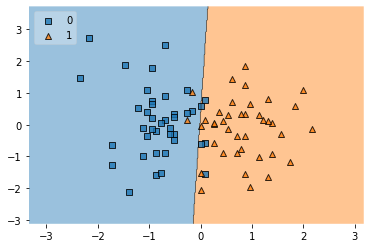

In [12]:
plot_decision_regions(X_train, Y_train.values, clf=model, legend=2)

In [14]:
pickle.dump(model, open('model.pkl', 'wb'))